1. Perform data preparations to clean data
2. Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
3. Cluster the data using K-Means, Hierarchical Clustering
4. Create a prediction model using any classification algorithm and compare the results
5. Submit your result through Github with the code run and showing results

<h3>Import Module</h3>

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import tree



<h3>Import Dataset</h3>

In [10]:
data = {
    'Body Temperature': ['Warm-blooded', 'Warm-blooded', 'Warm-blooded', 'Cold-blooded', 'Cold-blooded', 'Cold-blooded', 'Cold-blooded', 'Warm-blooded', 'Warm-blooded', 'Cold-blooded'],
    'Gives Birth': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'],
    'Four Legged': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
    'Hibernates': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes'],
    'Class Label': ['Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Menampilkan DataFrame
df.head()

,Body Temperature,Gives Birth,Four Legged,Hibernates,Class Label
0,Warm-blooded,Yes,No,No,Yes
1,Warm-blooded,No,No,No,No
2,Warm-blooded,Yes,Yes,No,Yes
3,Cold-blooded,Yes,No,No,No
4,Cold-blooded,No,Yes,No,No


In [11]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada fitur-fitur kategorikal
categorical_features = ['Body Temperature', 'Gives Birth', 'Four Legged', 'Hibernates', 'Class Label']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Menampilkan lima baris pertama dari dataset setelah Label Encoding
df.head()


,Body Temperature,Gives Birth,Four Legged,Hibernates,Class Label
0,1,1,0,0,1
1,1,0,0,0,0
2,1,1,1,0,1
3,0,1,0,0,0
4,0,0,1,0,0


In [12]:
from sklearn.tree import DecisionTreeClassifier

# Pisahkan fitur dan target
X = df.drop(['Class Label'], axis=1)  # Fitur
y = df['Class Label']  # Target

# Inisialisasi model Decision Stumps
base_model = DecisionTreeClassifier(max_depth=1)

# Latih model Decision Stumps
base_model.fit(X, y)

# Evaluasi akurasi model Decision Stumps
accuracy = base_model.score(X, y)
print(f"Akurasi Model Decision Stumps: {accuracy:.2f}")


Akurasi Model Decision Stumps: 0.90


In [13]:
# Inisialisasi bobot untuk setiap instance
weights = [1 / len(df)] * len(df)

# Jumlah iterasi yang diinginkan
n_iterations = 6

for iteration in range(n_iterations):
    # Menyamakan bobot untuk setiap iterasi
    weights = [weight / sum(weights) for weight in weights]

    # Latih model Decision Stumps pada data dengan bobot
    base_model.fit(X, y, sample_weight=weights)

    # Prediksi dengan model saat ini
    predictions = base_model.predict(X)

    # Hitung kesalahan prediksi
    errors = [int(prediction != actual) for prediction, actual in zip(predictions, y)]

    # Menghitung weighted error rate
    weighted_error = sum(weight * error for weight, error in zip(weights, errors))

    # Menghitung alpha (Bobot hasil model)
    alpha = 0.5 * np.log((1 - weighted_error) / max(weighted_error, 1e-10))

    # Menyesuaikan bobot untuk instance yang salah diprediksi
    weights = [weight * np.exp(alpha * error) for weight, error in zip(weights, errors)]

    # Menampilkan hasil setiap iterasi
    print(f"Iterasi {iteration + 1}: Weighted Error = {weighted_error:.4f}, Alpha = {alpha:.4f}")


Iterasi 1: Weighted Error = 0.1000, Alpha = 1.0986
Iterasi 2: Weighted Error = 0.1667, Alpha = 0.8047
Iterasi 3: Weighted Error = 0.2073, Alpha = 0.6707
Iterasi 4: Weighted Error = 0.3020, Alpha = 0.4189
Iterasi 5: Weighted Error = 0.2924, Alpha = 0.4419
Iterasi 6: Weighted Error = 0.2161, Alpha = 0.6442


In [14]:
# Inisialisasi prediksi akhir dengan bobot nol
final_predictions = [0] * len(X)

# Inisialisasi nilai total bobot alpha
total_alpha = 0

for iteration in range(n_iterations):
    # Menggunakan model saat ini untuk prediksi
    predictions = base_model.predict(X)

    # Mendapatkan alpha dari model saat ini
    alpha = 0.5 * np.log((1 - weighted_error) / max(weighted_error, 1e-10))

    # Menambahkan prediksi dengan bobot alpha ke prediksi akhir
    final_predictions = [sum(pair) for pair in zip(final_predictions, [alpha * pred for pred in predictions])]

    # Menambahkan bobot alpha ke total_alpha
    total_alpha += alpha

# Normalisasi prediksi akhir dengan total_alpha
final_predictions = [pred / total_alpha for pred in final_predictions]

# Mengonversi prediksi akhir menjadi kelas (misal: Yes atau No)
final_predictions = ['Yes' if pred > 0.5 else 'No' for pred in final_predictions]

# Menampilkan prediksi akhir
print("Prediksi Akhir:")
print(final_predictions)


Prediksi Akhir:
['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes']


d:\Download\Anaconda\Anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Body Temperature', 'Gives Birth', 'Four Legged', 'Hibernates'], dtype='object') instead.

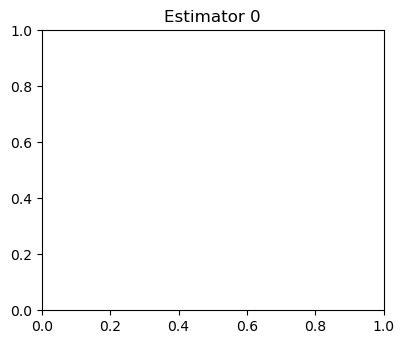

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

# Your DataFrame
data = {
    'Body Temperature': ['Warm-blooded', 'Warm-blooded', 'Warm-blooded', 'Cold-blooded', 'Cold-blooded', 'Cold-blooded', 'Cold-blooded', 'Warm-blooded', 'Warm-blooded', 'Cold-blooded'],
    'Gives Birth': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No'],
    'Four Legged': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
    'Hibernates': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes'],
    'Class Label': ['Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Label Encoding for categorical features
label_encoder = LabelEncoder()
categorical_features = ['Body Temperature', 'Gives Birth', 'Four Legged', 'Hibernates', 'Class Label']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

X = df.drop(['Class Label'], axis=1)  # Features
y = df['Class Label']  # Target

# Initialize Decision Stumps (Single-depth trees)
base_model = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost with Decision Stumps
adaboost_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=4)

# Train AdaBoost
adaboost_model.fit(X, y)

# Visualize base decision trees
plt.figure(figsize=(15, 8))
for i, tree_in_forest in enumerate(adaboost_model.estimators_):
    plt.subplot(2, 3, i + 1)
    plt.title(f'Estimator {i}')
    plot_tree(tree_in_forest, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)

plt.tight_layout()
plt.show()


d:\Download\Anaconda\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Download\Anaconda\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


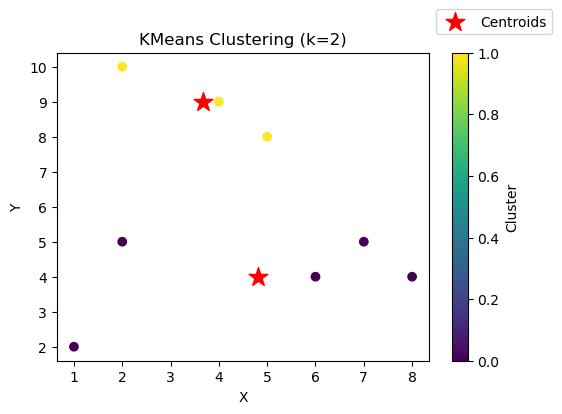

Hasil clustering dengan k=2:


,Item,Cluster_k2
0,A,2
1,B,1
2,C,1
3,D,2
4,E,1
5,F,1
6,G,1
7,H,2


d:\Download\Anaconda\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Download\Anaconda\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


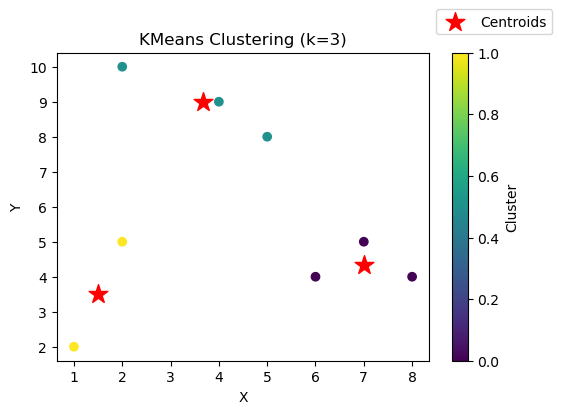

Hasil clustering dengan k=3:


,Item,Cluster_k3
0,A,2
1,B,3
2,C,1
3,D,2
4,E,1
5,F,1
6,G,3
7,H,2


In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dataset yang akan digunakan
data = {
    'Item': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'X': [2, 2, 8, 5, 7, 6, 1, 4],
    'Y': [10, 5, 4, 8, 5, 4, 2, 9]
}
df = pd.DataFrame(data)

# Mengambil fitur yang akan digunakan untuk clustering (X dan Y)
X = df[['X', 'Y']]

# Melakukan KMeans clustering dengan k=2 dan k=3
for k in [2, 3]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'Cluster_k{k}'] = kmeans.fit_predict(X) + 1
    centroids = kmeans.cluster_centers_

    # Visualisasi hasil clustering
    plt.figure(figsize=(6, 4))
    plt.scatter(df['X'], df['Y'], c=df[f'Cluster_k{k}'], cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centroids')
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(label='Cluster')
    plt.legend(loc='center left', bbox_to_anchor=(1, 1.1))
    plt.show()

    print(f"Hasil clustering dengan k={k}:")
    display(df[['Item', f'Cluster_k{k}']])


In [27]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

dataset = [
    ['A', 'B', 'C'],
    ['B', 'C', 'D'],
    ['D', 'E'],
    ['A', 'B', 'D'],
    ['A', 'B', 'C', 'E'],
    ['A', 'B', 'C', 'D']
]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Percobaan 1 dengan min support 50% dan min confidence 60% 
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
display(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
columns_to_drop = ['lift', 'leverage', 'conviction', 'zhangs_metric']
rules = rules.drop(columns=columns_to_drop)
rules


,support,itemsets
0,0.666667,(A)
1,0.833333,(B)
2,0.666667,(C)
3,0.666667,(D)
4,0.666667,"(A, B)"
5,0.500000,"(A, C)"
6,0.666667,"(C, B)"
7,0.500000,"(D, B)"
8,0.500000,"(A, C, B)"


,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(A),(B),0.666667,0.833333,0.666667,1.00
1,(B),(A),0.833333,0.666667,0.666667,0.80
2,(A),(C),0.666667,0.666667,0.500000,0.75
3,(C),(A),0.666667,0.666667,0.500000,0.75
4,(C),(B),0.666667,0.833333,0.666667,1.00
5,(B),(C),0.833333,0.666667,0.666667,0.80
6,(D),(B),0.666667,0.833333,0.500000,0.75
7,(B),(D),0.833333,0.666667,0.500000,0.60
8,"(A, C)",(B),0.500000,0.833333,0.500000,1.00
9,"(A, B)",(C),0.666667,0.666667,0.500000,0.75


In [28]:
# Percobaan 2 dengan min support 60% dan min confidence 60% 
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
display(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
columns_to_drop = ['lift', 'leverage', 'conviction', 'zhangs_metric']
rules = rules.drop(columns=columns_to_drop)
rules

,support,itemsets
0,0.666667,(A)
1,0.833333,(B)
2,0.666667,(C)
3,0.666667,(D)
4,0.666667,"(A, B)"
5,0.666667,"(C, B)"


,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(A),(B),0.666667,0.833333,0.666667,1.0
1,(B),(A),0.833333,0.666667,0.666667,0.8
2,(C),(B),0.666667,0.833333,0.666667,1.0
3,(B),(C),0.833333,0.666667,0.666667,0.8
